In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
np.random.seed = 42

# Minimum Variance Unbiased Estimation

## Unbiased Estimators

An unbiased estimator $\hat{\theta}$ of parameter $\theta$ is an estimator with the following property
$$\mathbb{E}(\hat{\theta})=\theta$$

For example, an unbiased estimator for DC level in White Gaussian Noise

In [2]:
A = 3.    # -inf < A < inf
std = 5
N = 100
w = np.random.normal(0, std, N) # WGN
x = A + w


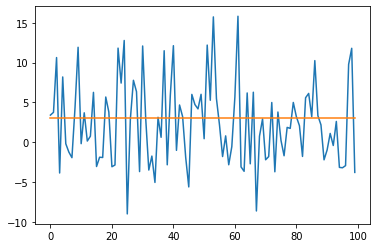

In [3]:
plt.plot(x)
plt.plot(A*np.ones(N))

A resonable estimator would be
$$\hat{A}=\frac{1}{N}\sum_{n=0}^{N-1}{x[n]}$$
or the sample mean, and it's unbiased from linearity of expectation
$$\begin{align}
E(\hat{A})&=E\left[\frac{1}{N}\sum_{n=0}^{N-1}{x[n]}\right] \\
&=\frac{1}{N}\sum_{n=0}^{N-1}{E(x[n])} \\
&=\frac{1}{N}\sum_{n=0}^{N-1}{A} \\
&=A\end{align}$$
(Note: takes a long time to write these equations, also this is rather trivial...).

In [4]:
# a reasonable estimator
A_hat = x.mean()

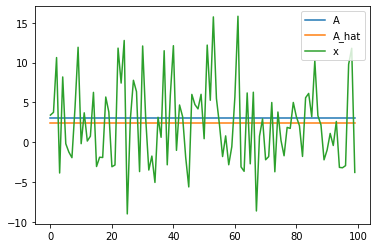

In [5]:
plt.plot(np.ones(N)*A)
plt.plot(np.ones(N)*A_hat)
plt.plot(x)
plt.legend(["A", "A_hat", "x"]);

Since $\hat{A}$ is really just a linear transformation of $\omega$ it can be shown that $\hat{A}\sim\cal{N}(A,\sigma^2/N)$, and plotted

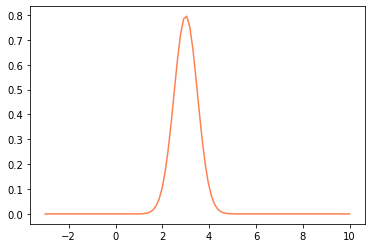

In [6]:
x = np.linspace(-3, 10, 100)
y = scipy.stats.norm.pdf(x,A,std/np.sqrt(N))
plt.plot(x,y, color='coral');

What if we use a biased estimator?
Stupid example
$$\begin{align} E(\check{A}) &= \frac12A \\
&= A\text{ if }A=0 \\
&\neq A\text{ if }A\neq0
\end{align}$$
So $E(\check{A})=A$ only if $A=0$.

You might ask, why care for unbiased estimators? it is not sufficient for guarranting a good estimator? One thing to note is that biased estimators have a systematic error, which is something we naturally want to avoid. One motivating example is when we have several estimators of the same parameters. If they are all unbiased, the mean of them will be unbiased, and if uncorrelated, than the variance decrease.

QUESTION: Does the average of two gaussians with different variance produce a gaussian with smaller variance than both?

On the other hand, if one of the estimators is biased, so will be the combination.

## Minimum Variance Criterion

We are searching for optimal estimators, so we need an optimality criterion. A natural one would be the MSE
$$\text{mse}(\hat\theta)=E\left[(\hat\theta-\theta)^2\right]$$
Sadly, adopting this criterion leads to unrealizable estimators, who are not only functions of the data. The MSE can also be written as
$$\text{mse}(\hat\theta)=\text{var}(\hat\theta)+b^2(\theta)$$

See example in book, but in general any criterion which depends on the bias will lead to unrealizable estimators.

So, instead we take a different route, constrain the bias to zero and look for the minimum variance estimator. In case the MSE-optimal estimator is unbiased, the MVU estimator will be the MSE estimator.

We should not that there isn't necesseraly a MVU estimator, ie an unbiased estimator with minimum variance for all $\theta$. There might not even be an unbiased estimator, for the matter.

## Finding the MVU Estimator

How does one go about finding the MVU estimator? Yet another disappointment, there is no "turn-the-crank" procedure which will always produce it. Instead, we have several approaches:

1. Determine the CRLB and see if some estimator satisfies it.
2. Apply RBLS theorem
3. Add restriction of linearity, and find the MVU in that class.

We will learn about these approaches in the following chapters.

## Problems

**2.2** $x[i]\sim\cal{U}[0,\theta]$ for $i=1,\dots,N-1$, and the samples are IID. Can we find an unbiased estimator for $\theta$ if $0<\theta<\infty$?

My first guess was,
$$\hat\theta=\max\left\{x[i]\mid i\right\}$$
but it is biased (easily observed from the fact that it will never be greater than $\theta$). In general, $E(x[i])=\frac\theta2$, so
$$\hat\theta_i=2x[i]$$
is an unbiased estimator. We can further improve the estimator by averaging all the $\hat\theta_i$. If $\text{var}(\hat\theta_i)=\frac\theta{3}$, then
$$\hat\theta=\frac1N\sum\theta_i$$ will have $$\text{var}(\hat\theta)=\frac{\theta^2}{3N}$$

In [7]:
theta = 10.
N = 100
x = np.random.uniform(0., theta, N)
theta_hat1 = np.max(x)
theta_hat2 = 2*x.mean()

'theta:10.0, h1:0.37335569374063127, h2:0.7957141308806133'

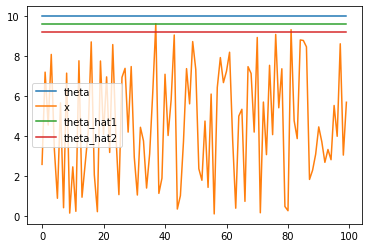

In [8]:
plt.plot(theta*np.ones(N))
plt.plot(x)
plt.plot(theta_hat1*np.ones(N))
plt.plot(theta_hat2*np.ones(N))
plt.legend(['theta','x','theta_hat1','theta_hat2']);
f"theta:{theta}, h1:{abs(theta-theta_hat1)}, h2:{abs(theta-theta_hat2)}"

Interestingly enough, from some observations it seems that although the first estimator is biased, it yields a closer value to $\theta$. Let's try to calculate the expectation, from [stack exchange](https://math.stackexchange.com/questions/197299/expected-value-of-maximum-of-two-random-variables-from-uniform-distribution)
$$\begin{align}
E(\hat\theta) &= \int_0^\infty(1-P(\max\{x[i]\}<=z))dz \\
&= \int_0^\infty(1-\prod_i{P(x[i]<=z)})dz \\
&= \int_0^\infty(1-\prod_i{\frac{z}\theta})dz \\
&= \int_0^\theta(1-(\frac{z}\theta)^N)dz \\
&= \theta - \frac1{\theta^N}\int_0^\theta z^Ndz \\
&= \theta - \frac1{\theta^N}\left[\frac{z^{N+1}}{N+1}\right]_0^\theta \\
&= \theta - \frac{\theta^{N+1}}{(N+1)\theta^N} = \frac{N}{N+1}\theta
\end{align}$$

Biased but obviously improves as N increases.

As for the variance, we remember that
$$\text{var}(\hat\theta)=E(\hat{\theta^2})-E(\hat\theta)^2$$
And so
$$E(\hat{\theta^2})=\int_0^\theta z^2P(\hat\theta=z)dz$$
We calculated the cdf and not the pdf but from differentiation we get
$$\begin{align}
E(\hat{\theta^2}) &= \int_0^\theta z^2\frac{N}{\theta^N}z^{N-1}dz \\
&= \frac{N}{\theta^N}\left[\frac{z^{N+2}}{N+2}\right]_0^\theta \\
&= \frac{N}{\theta^N}\frac{\theta^{N+2}}{N+2} \\
&= \frac{N}{N+2}\theta^2
\end{align}$$
Phew, and so
$$\begin{align}
\text{var}(\hat\theta) &= \frac{N}{N+2}\theta^2 - (\frac{N}{N+1})^2\theta^2 \\
&= \left(\frac{N}{N+2} - (\frac{N}{N+1})^2\right)\theta^2
\end{align}$$

Okay, let's plot the variances as a function of N

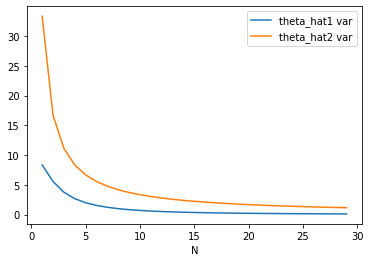

In [15]:
Ns = np.arange(1, 30)
var1 = np.array([((i/(i+2))-(i/(i+1))**2)*theta*theta for i in Ns])
var2 = theta*theta / (3*Ns)
fig, ax = plt.subplots()
ax.plot(Ns, var1, label='theta_hat1 var')
ax.plot(Ns, var2, label='theta_hat2 var')
ax.set_xlabel("N")
plt.legend();

So we can see (and could actually calculate, only that I had some mistakes at first) that the variance of max-estimate is better for any N, regardless of $\theta$. And what about the MSE? well the mse of the mean-estimator is just the variance since it is unbiased. And the max-estimator is
$$\begin{align}
\text{var}(\hat\theta)+b^2(\hat\theta) &= \left(\frac{N}{N+2} - (\frac{N}{N+1})^2\right)\theta^2 + \left[\frac{N}{N+1}\theta-\theta\right]^2 \\ 
&= \left(\frac{N}{N+2} - (\frac{N}{N+1})^2\right)\theta^2 +
\frac1{(N+1)^2}\theta^2
\end{align}$$

and since I'm lazy, let's just see the plot

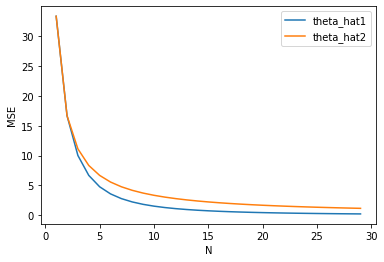

In [17]:
mse1 = var1 + theta*theta/(Ns+1)**2
mse2 = var2
fig, ax = plt.subplots()
ax.plot(Ns, mse1, label='theta_hat1')
ax.plot(Ns, mse2, label='theta_hat2')
ax.set_xlabel("N")
ax.set_ylabel("MSE")
plt.legend();

And again we see the MSE of max-estimator is better than mean-estimator. A good example of when a biased estimator is better than an unbiased one, atleast in the MSE sense.